In [1]:
from modules import solve_sdos_adv as slvadv
from modules import solve_sdos as slvsdos
from scipy.sparse.linalg import lsmr
from scipy.signal import savgol_filter
from modules import peakdetect as pd
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=loadtxt("./Data/18c25s004.txt")

In [3]:
smdata=np.zeros(data.shape,np.float64)
for i in range(data.shape[1]):
    smdata[:,i]=savgol_filter(data[:,i],81,2)
    smdata[:,i]=smdata[:,i]/smdata[2100,i]
smdata[:,0]=data[:,0]/100    

<IPython.core.display.Javascript object>


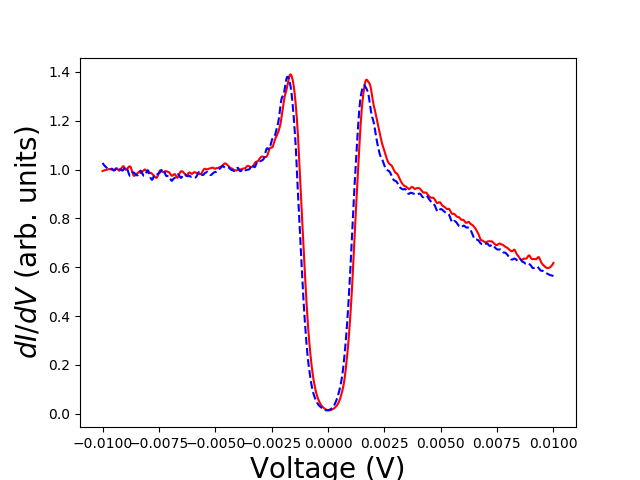

(-0.011007766349999998,
 0.011007003349999999,
 -0.055336613363154118,
 1.4589568246714422)

In [4]:
figure()
plot(smdata[:,0],smdata[:,32],'r-')
plot(smdata[:,0],smdata[:,31],'b--')
xlabel("Voltage (V)",fontsize=20)
ylabel(r"$dI/dV$ (arb. units)",fontsize=20)
plt.axis('tight')

In [5]:
guess=[8e-5,1.3e-3,2.2]
lb=[1e-6,1e-3,1.]
ub=[5e-4,3e-3,3.]
par31=slvadv.get_params(smdata[:,0],smdata[:,31],guess,lb,ub)

# Backward and forward data acquired at same point: due to offset in voltage delta and temperature values are different

In [6]:
par31

array([  7.60062250e-05,   1.45640949e-03,   2.64023097e+00])

In [56]:
guess=[8e-5,1.3e-3,2.2]
lb=[1e-6,1e-3,1.]
ub=[5e-4,3e-3,3.]
par32offcor=slvadv.get_params(smdata[:,0],smdata[:,32],guess,lb,ub)

In [8]:
par32

array([  8.08039467e-05,   1.37845147e-03,   2.40877286e+00])

## offset correction by detecting peak and taking difference of the voltage value at peak position 

In [13]:
import numpy as np
from modules import detect_peaks

In [136]:
offset27=np.zeros([smdata.shape[0],2],np.float64)
offset27[:,0]=smdata[:,0]
offset27[:,1]=smdata[:,27]

<IPython.core.display.Javascript object>


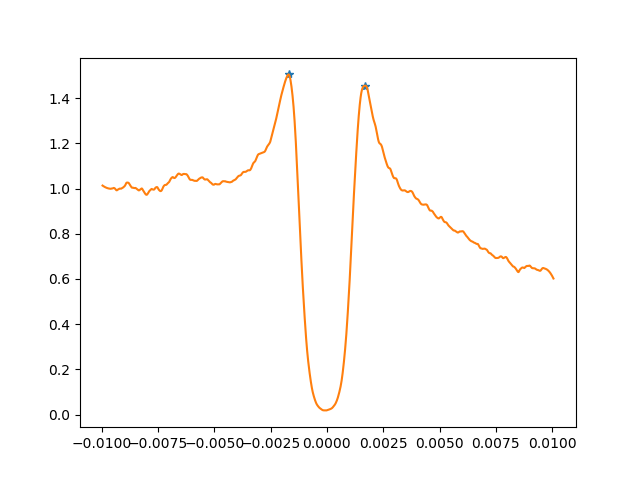

In [143]:
ind=detect_peaks.detect_peaks(offset27[:,1],1.3,100)
figure()
plot(offset27[ind,0],offset27[ind,1],'*')
plot(offset27[:,0],offset27[:,1])                 

In [144]:
offset27[ind,0]

array([ 0.00170288, -0.00170288])

In [140]:
offs=(offset27[ind[0],0]+offset27[ind[1],0])/2

In [141]:
offs

-4.6157849999999977e-05

In [142]:
offset27[:,0]+=-1*offs

In [100]:
par31

array([  7.60062250e-05,   1.45640949e-03,   2.64023097e+00])

In [145]:
guess=[8e-5,1.3e-3,2.2]
lb=[1e-6,1e-3,1.]
ub=[5e-4,3e-3,3.]
par27offcor=slvadv.get_params(offset27[:,0],offset27[:,1],guess,lb,ub)

In [102]:
par31offcor

array([  8.89309407e-05,   1.35414269e-03,   2.35634597e+00])

In [103]:
par32offcor

array([  8.88023492e-05,   1.34613370e-03,   2.31880943e+00])

In [115]:
par30offcor

array([  8.09945572e-05,   1.38125999e-03,   2.48524724e+00])

In [124]:
par29offcor

array([  8.06388478e-05,   1.38397351e-03,   2.47639853e+00])

In [135]:
par28offcor

array([  1.72738906e-04,   1.36344849e-03,   2.04732642e+00])

In [146]:
par27offcor

array([  7.66398146e-05,   1.40201748e-03,   2.51563796e+00])